# Proyek Analisis Data: Bike Sharing
- **Nama:** Naufal Putra Sutrisna
- **Email:** naufalptrs@student.ub.ac.id
- **ID Dicoding:** naufalptrs

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan suatu musim terhadap rata rata persewaan sepeda? Pada musim manakah yang memiliki rata rata persewaan sepeda tertinggi?
- Bagaimana pengaruh cuaca terhadap rata rata persewaan sepeda?
- Pada pukul berapakah yang memiliki rata rata persewaan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
data_path = os.path.join(os.getcwd(), 'data', 'data_1.csv')

Kode diatas berfungsi untuk mendefinisikan absolute path dataset yang akan digunakan.

In [3]:
df = pd.read_csv(data_path)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Melakukan read csv dengan menggunakan pandas dan menampilkan 5 data teratas.

In [4]:
print("Dataset Bike Sharing memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bike Sharing memiliki 17379 baris dan 17 kolom


Melakukan pengecekan terhadap dimensi dataframe yang akan diproses lebih lanjut.

### Assessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan temuan diatas, dapat diketahui bahwa pada kolom dteday bertipe data object. Sedangkan value pada kolom tersebut adalah tanggal. Maka dari itu, kita perlu untuk mengubah tipe data pada kolom dteday yang semula object akan diubah menjadi datetime64.

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kode diatas menampilkan bahwa tidak terdapat missing value pada dataframe tersebut.

In [7]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kode diatas menampilkan statistik kolom numerik pada setiap data. Data tersebut memiliki value pada tiap kolom yang telah sesuai dengan Readme.txt.

In [8]:
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 0


Berdasarkan kode diatas, tidak terdapat duplikasi data pada masing masing dataframe.

### Cleaning Data

In [9]:
df = df.rename(columns={'dteday': 'date', 
                        'yr': 'year',
                        'mnth': 'month',
                        'hr': 'hour',
                        'cnt': 'count'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengubah beberapa nama kolom pada dataframe agar seragam dengan kolom yang lain.

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

Pada kode diatas, saya mengubah tipe data kolom dteday yang semula object menjadi datetime64.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
df.groupby(by='season')['count'].mean().reset_index()

,season,count
0,1,111.114569
1,2,208.344069
2,3,236.016237
3,4,198.868856


Pada kode diatas, saya menemukan fakta bahwa ketika musim gugur memiliki rata rata penyewa paling banyak. Sedangkan pada musim semi memiliki rata rata penyewa paling rendah.

In [12]:
df.groupby(by='weathersit')['count'].mean().reset_index()

,weathersit,count
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


Pada kode tersebut, saya menemukan fakta bahwa pada cuaca cerah memiliki rata rata penyewa yang paling banyak. Sedangkan pada cuaca hujan lebat memiliki rata rata penyewa paling rendah.

In [13]:
df.groupby(by='hour').agg({
    'count': ['mean', 'max', 'min'],
})

count         
            mean  max min
hour                     
0      53.898072  283   2
1      33.375691  168   1
2      22.869930  132   1
3      11.727403   79   1
4       6.352941   28   1
5      19.889819   66   1
6      76.044138  213   1
7     212.064649  596   1
8     359.011004  839   5
9     219.309491  426  14
10    173.668501  539   8
11    208.143054  663  10
12    253.315934  776   3
13    253.661180  760  11
14    240.949246  750  12
15    251.233196  750   7
16    311.983562  783  11
17    461.452055  976  15
18    425.510989  977  23
19    311.523352  743  11
20    226.030220  567  11
21    172.314560  584   6
22    131.335165  502   9
23     87.831044  256   2

Pada eda diatas, kita dapat melihat bahwa rata rata penyewa tertinggi berada pada pukul 17. Namun, Jumlah penyewa terbanyak berada pada pukul 18.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [14]:
season_mapping = {
    1: "Summer",
    2: "Fall",
    3: "Winter",
    4: "Spring"
}

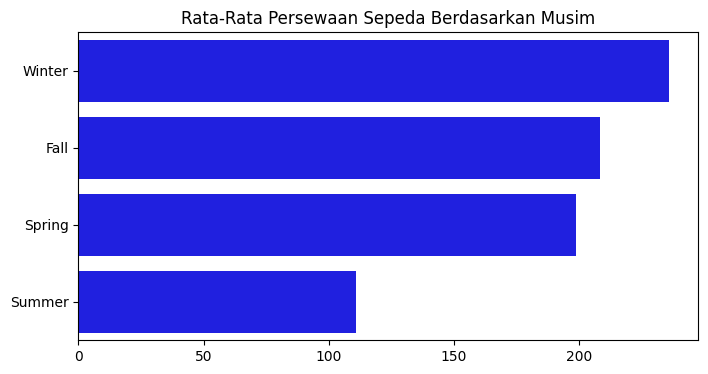

In [15]:
seasons_data = df.groupby('season')['count'].mean().reset_index()
seasons_data = seasons_data.set_index('season').reindex(range(1, 5), fill_value=0).reset_index()
seasons_data = seasons_data.sort_values(by='count', ascending=False)
seasons_data['season'] = seasons_data['season'].map(season_mapping)
        
plt.figure(figsize=(8, 4))
sns.barplot(data=seasons_data,
            x='count', 
            y='season', 
            orient="h", 
            color='blue',
            order=seasons_data['season'])
plt.xlabel(None)
plt.ylabel(None)
plt.title("Rata-Rata Persewaan Sepeda Berdasarkan Musim")
        
plt.show()

Kode diatas merupakan visualisasi rata rata persewaan sepeda berdasarkan musim dalam basis jam. Dapat dilihat bahwa pada musim salju memiliki rata rata persewaan paling tinggi tiap jamnya.

### Pertanyaan 2:

In [16]:
weather_mapping = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
}

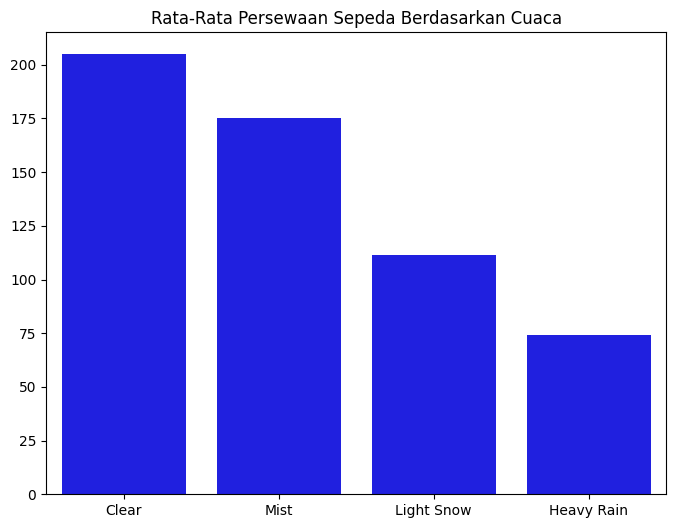

In [17]:
weathersit_data = df.groupby('weathersit')['count'].mean().reset_index()
weathersit_data = weathersit_data.set_index('weathersit').reindex(range(1, 5), fill_value=0).reset_index()
weathersit_data = weathersit_data.sort_values(by='count', ascending=False)
weathersit_data['weathersit'] = weathersit_data['weathersit'].map(weather_mapping)
        
plt.figure(figsize=(8, 6)) 
sns.barplot(data=weathersit_data, 
            x='weathersit', 
            y='count', 
            orient='v', 
            color='blue',
            order=weathersit_data['weathersit'])
plt.xlabel(None)
plt.ylabel(None)
plt.title("Rata-Rata Persewaan Sepeda Berdasarkan Cuaca")

plt.show()

Kode diatas merupakan visualisasi rata rata persewaan sepeda berdasarkan cuaca dalam basis jam. Dapat dilihat bahwa pada cuaca cerah memiliki rata rata persewaan paling tinggi tiap jamnya.

### Pertanyaan 3:

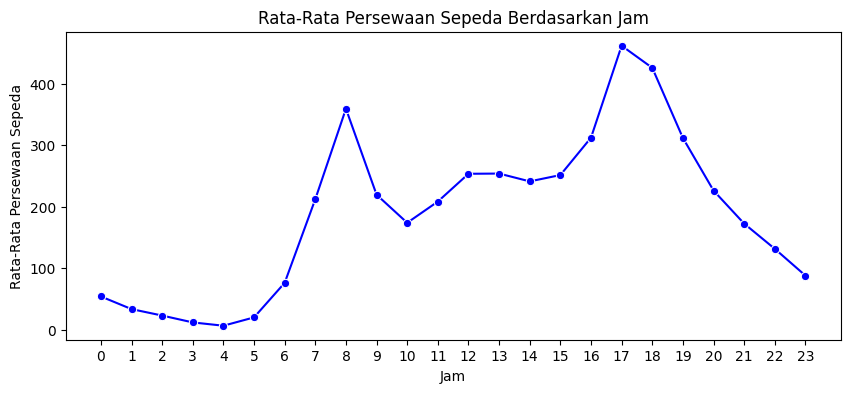

In [18]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df.groupby('hour')['count'].mean().reset_index(), 
             x='hour', 
             y='count', 
             color='blue',
             marker='o')
plt.xticks(df.groupby('hour')['count'].mean().reset_index()['hour'])
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Persewaan Sepeda')
plt.title('Rata-Rata Persewaan Sepeda Berdasarkan Jam')
plt.show()

Kode diatas merupakan visualisasi rata rata persewaan sepeda berdasarkan jam. Dapat dilihat bahwa pada pukul 17 memiliki rata rata persewaan paling tinggi dibandingkan dengan jam jam lainnya.

## Conclusion

- **Conclution pertanyaan 1**: Musim memiliki hubungan yang sangat erat dengan rata rata persewaan sepeda. Rata rata persewaan sepeda tertinggi terjadi pada musim Salju. Hal ini dikarenakan Washington D.C. memiliki sejumlah infrastruktur bersepeda yang baik, termasuk jalur sepeda yang terpisah dan program sepeda umum seperti Capital Bikeshare. Selain itu, meskipun musim salju dapat mempengaruhi aktivitas bersepeda bagi penduduk lokal, wisatawan yang mengunjungi Washington D.C. selama musim dingin mungkin tetap tertarik untuk menjelajahi kota dengan sepeda.
- **Conclution** pertanyaan 2: Kondisi cuaca mempengaruhi rata rata persewaan sepeda. Rata rata persewaan sepeda tertinggi terjadi pada cuaca cerah. Hal ini dikarenakan cuaca cerah cenderung membuat orang merasa lebih nyaman untuk bersepeda di luar ruangan. Selain itu, cuaca cerah biasanya berarti kondisi jalan yang lebih baik dan lebih aman untuk bersepeda. Jalan-jalan yang kering dan tidak licin memungkinkan untuk pengalaman bersepeda yang lebih menyenangkan dan lebih aman, yang dapat mendorong lebih banyak orang untuk menyewa sepeda.
- **Conclution** pertanyaan 3: Rata rata persewaan sepeda tertinggi terjadi pada pukul 17. Hal ini dikarenakan pada pukul 17, cuaca seringkali masih cerah dan cenderung stabil. Kondisi cuaca yang baik memungkinkan untuk pengalaman bersepeda yang lebih nyaman dan aman, yang dapat meningkatkan minat orang untuk menyewa sepeda. Disamping itu, pukul 17 adalah waktu dimana banyak orang memiliki waktu luang untuk melakukan aktivitas rekreasi atau olahraga. 